In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sqlite3

In [3]:
connection = sqlite3.connect(r'/Users/haleigh/Desktop/Udemy Courses/Data Analysis Projects/Amazon Customers Project/database.sqlite')

In [4]:
type(connection)

sqlite3.Connection

In [5]:
df = pd.read_sql_query("SELECT * FROM REVIEWS", connection)

In [6]:
# raw data
df.shape

(568454, 10)

In [7]:
# data preparation for analysis
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [8]:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [9]:
# valid rows
df_valid = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]

In [10]:
df_valid.shape

(568452, 10)

In [11]:
df_valid.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [12]:
# remove duplicate rows for unbiased results
df_valid.duplicated(['UserId', 'ProfileName','Time','Text'])

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

In [13]:
# shows count of duplicate rows
df_valid[df_valid.duplicated(['UserId', 'ProfileName','Time','Text'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


In [14]:
# remove duplicate rows (174521 rows × 10 columns)
data = df_valid.drop_duplicates(subset =['UserId', 'ProfileName','Time','Text'])

In [15]:
data.shape

(393931, 10)

In [16]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [17]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [18]:
data['Time'] = pd.to_datetime(data['Time'], unit= 's')

In [19]:
# analyse what amazon can recommend more to a user
data['ProfileName']

0                              delmartian
1                                  dll pa
2         Natalia Corres "Natalia Corres"
3                                    Karl
4           Michael D. Bigham "M. Wassir"
                       ...               
568449                   Lettie D. Carter
568450                          R. Sawyer
568451                      pksd "pk_007"
568452            Kathy A. Welch "katwel"
568453                           srfell17
Name: ProfileName, Length: 393931, dtype: object

In [20]:
data['ProfileName'].unique() # get unique names

array(['delmartian', 'dll pa', 'Natalia Corres "Natalia Corres"', ...,
       'Lettie D. Carter', 'pksd "pk_007"', 'srfell17'], dtype=object)

In [21]:
data['UserId'].nunique() # count of unique users

256059

In [22]:
recommend_df = data.groupby(['UserId']).agg({'Summary':'count', 'Text':'count', 'Score':'mean', 'ProductId':'count'}).sort_values(by='ProductId',ascending=False)

In [23]:
recommend_df.columns = ['Number_of_Summaries', 'Num_Text', 'Average_Score', 'Products_Purchased']

In [24]:
recommend_df

,Number_of_Summaries,Num_Text,Average_Score,Products_Purchased
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [25]:
recommend_df.index[0:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [26]:
recommend_df['Products_Purchased'][0:10].values

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

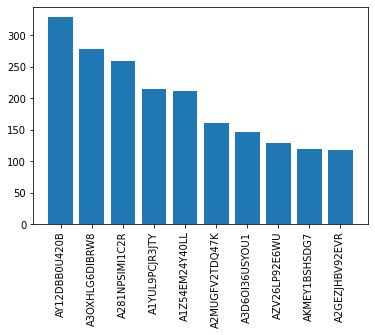

In [27]:
plt.bar(recommend_df.index[0:10], recommend_df['Products_Purchased'][0:10].values)
plt.xticks(rotation='vertical')

In [28]:
# which product has a good amount of reviews
# how many unique products do we have in data?
len(data['ProductId'].unique())

67624

In [29]:
# threshold value for a "good amount" of products should be greater than 500
product_count = data['ProductId'].value_counts().to_frame()

In [30]:
product_count[product_count['ProductId']>500]

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541
B0090X8IPM,530


In [31]:
# most frequent products
frequent_product_ids = product_count[product_count['ProductId']>500].index 

In [32]:
data['ProductId'].isin(frequent_product_ids)

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: ProductId, Length: 393931, dtype: bool

In [33]:
frequent_product_df = data[data['ProductId'].isin(frequent_product_ids)]

In [34]:
frequent_product_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='ProductId'>

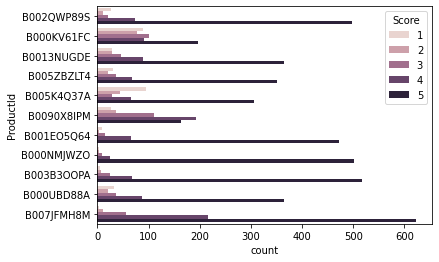

In [35]:
sns.countplot(y = 'ProductId', data = frequent_product_df, hue = 'Score')

In [36]:
# is there a difference between the behabior of the freq. viewers and not freq. viewers regarding a purchase
# freq. viewer = bought the product 50 times or more

In [37]:
x = data['UserId'].value_counts()

In [38]:
x['AY12DBB0U420B']

329

In [39]:
# if a user has a count of 50 it will be frequent
# consider the user as a pointer to each row of the UserId
data['viewer_type'] = data['UserId'].apply(lambda user : "Frequent" if x[user]>50 else "Not Frequent")

In [40]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent


In [41]:
data['viewer_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [42]:
not_frequent_df = data[data['viewer_type'] == 'Not Frequent']
frequent_df = data[data['viewer_type'] == 'Frequent']

<AxesSubplot:>

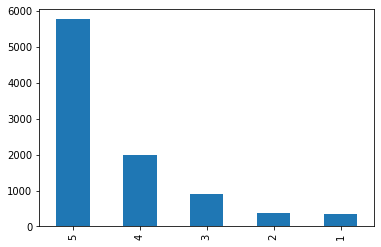

In [43]:
frequent_df['Score'].value_counts().plot(kind='bar')

<AxesSubplot:>

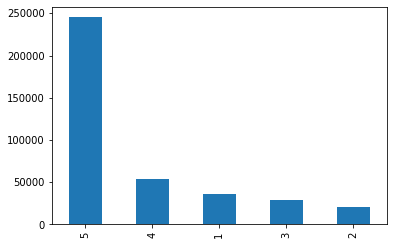

In [44]:
not_frequent_df['Score'].value_counts().plot(kind='bar')

In [45]:
# are frequent viewers more likely to leave reviews?
data[['UserId', 'ProductId', 'Text']]

,UserId,ProductId,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,Great taffy at a great price. There was a wid...
...,...,...,...
568449,A28KG5XORO54AY,B001EO7N10,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,B003S1WTCU,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,B004I613EE,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,B004I613EE,These are the BEST treats for training and rew...


In [46]:
def calculate_length(text):
    return len(text.split(' '))

In [47]:
data['Text_length'] = data['Text'].apply(calculate_length)

In [48]:
data['viewer_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [49]:
not_frequent_data = data[data['viewer_type'] == 'Not Frequent']
frequent_data = data[data['viewer_type'] == 'Frequent']

(0.0, 600.0)

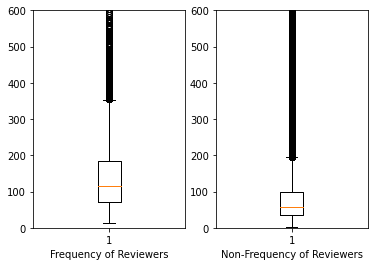

In [50]:
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.boxplot(frequent_data['Text_length'])
ax1.set_xlabel('Frequency of Reviewers')
ax1.set_ylim(0,600)

ax2 = fig.add_subplot(122)
ax2.boxplot(not_frequent_data['Text_length'])
ax2.set_xlabel('Non-Frequency of Reviewers')
ax2.set_ylim(0,600)

In [51]:
# perform sentiment analysis on the data
!pip install textblob
from textblob import TextBlob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.4 MB/s eta 0:00:00


In [53]:
data['Summary'][0]

'Good Quality Dog Food'

In [54]:
TextBlob('Good Quality Dog Food').sentiment.polarity

0.7

In [56]:
sample = data[0:50000]

In [57]:
polarity = []

for text in sample['Summary']:
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)

In [58]:
len(polarity)

50000

In [59]:
sample['polarity'] = polarity

In [61]:
# now we have a polarity feature
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30,0.8


In [64]:
# entire data frame for negative polarity
negative_polarity = sample[sample['polarity'] < 0]
positive_polarity = sample[sample['polarity'] > 0]

In [66]:
from collections import Counter

In [68]:
Counter(negative_polarity['Summary']).most_common(50)

[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('disappointed', 15),
 ('Disgusting', 12),
 ('not good', 11),
 ("Don't waste your money", 11),
 ('Not good', 10),
 ('Very Disappointed', 10),
 ('disappointing', 9),
 ('Not worth the money', 9),
 ('Not Good', 8),
 ('Not very good', 8),
 ('Not impressed', 8),
 ('Nasty', 8),
 ('Stale', 7),
 ('Bitter', 6),
 ('Waste of money', 6),
 ('Hard to find', 6),
 ('Mediocre', 6),
 ('Weak', 6),
 ('AWFUL', 5),
 ('Addicted', 5),
 ('awful', 5),
 ('Poor Quality', 5),
 ('Not worth it', 5),
 ('Not great', 5),
 ('Bad aftertaste', 5),
 ('Bad', 4),
 ('Disappointed!', 4),
 ('too expensive', 4),
 ('Tasteless', 4),
 ('Terrible!', 4),
 ('Not too bad', 4),
 ('not what I expected', 4),
 ('horrible', 4),
 ('Not what I expected.', 4),
 ('Too expensive', 4),
 ('As expected', 4),
 ('Lipton Loose Tea', 4),
 ('Disappointment', 4),
 ('stale', 4),
 ('Expensive', 4),
 ('Awful!', 

In [69]:
Counter(positive_polarity['Summary']).most_common(50)

[('Delicious!', 208),
 ('Delicious', 204),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 77),
 ('Great!', 70),
 ('Good stuff', 51),
 ('Awesome', 50),
 ('Excellent!', 44),
 ('Good Stuff', 44),
 ('The Best', 43),
 ('great product', 43),
 ('Great Coffee', 43),
 ('Awesome!', 43),
 ('Love it', 37),
 ('Wonderful', 35),
 ('Good', 34),
 ('Fantastic!', 34),
 ('Amazing', 34),
 ('Great product!', 34),
 ('Great taste', 34),
 ('Good product', 33),
 ('Perfect', 32),
 ('delicious', 31),
 ('Great Tea', 31),
 ('Great coffee', 31),
 ('Excellent product', 31),
 ('Very good', 29),
 ('Wonderful!', 28),
 ('Fantastic', 28),
 ('Amazing!', 27),
 ('Excellent Product', 27),
 ('Love these!', 25),
 ('great', 25),
 ('Perfect!', 25),
 ('great coffee', 24),
 ('very good', 24),
 ('Great flavor', 24),
 ('Great Product!', 23),
 ('Good stuff!', 22),
 ('Pretty Good', 22),
 ('good stuff', 22),
 ('Pretty good', 22),
 ('Great Taste', 22),
 ('Great stuff', 21),
 ('Great Stu